In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
day_df= pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.drop('instant', axis=1, inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


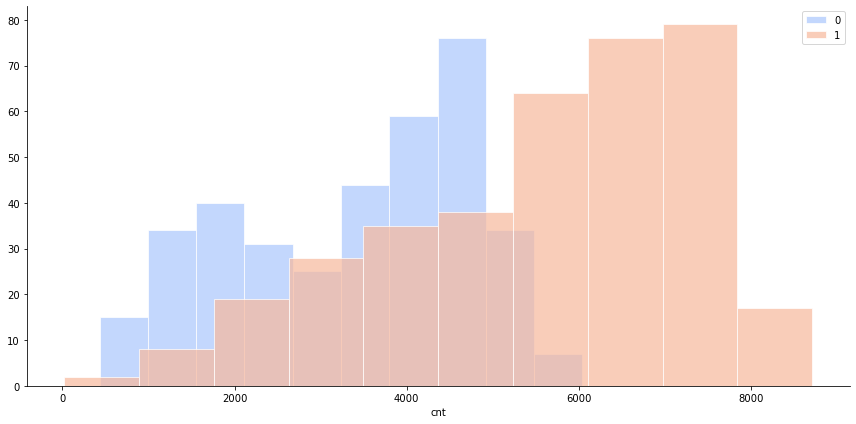

In [5]:
g=sns.FacetGrid(day_df, hue='yr', palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.7, edgecolor='w')
plt.legend()

Text(0.5, 1.0, 'Number of bikes rented per season')

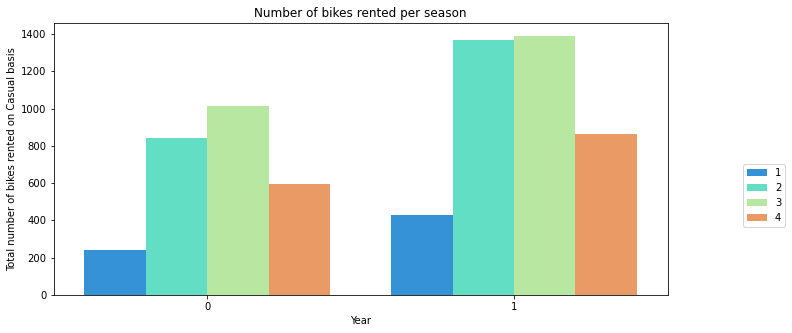

In [6]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

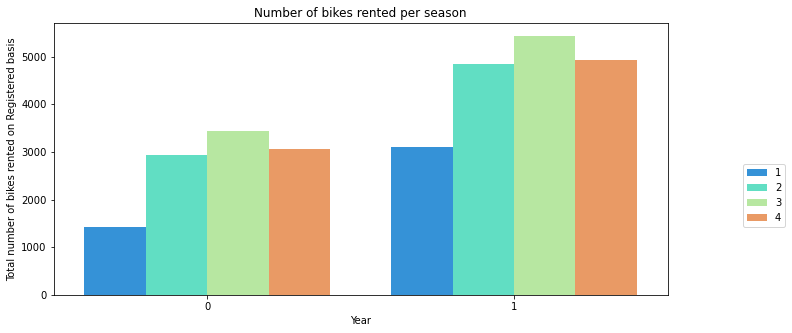

In [7]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

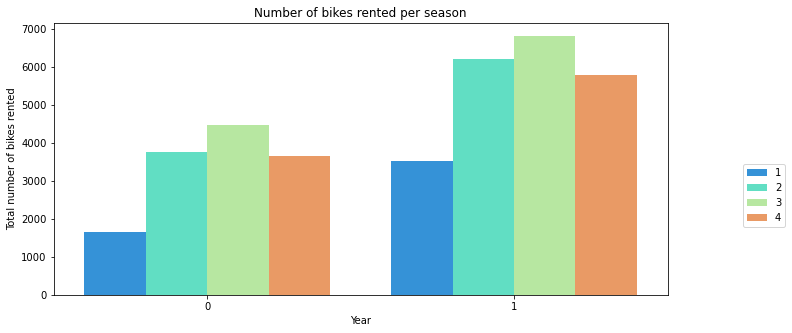

In [8]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

In [9]:
df_season_fall= day_df[day_df['season']==3]

In [10]:
df_season_fall.mnth.nunique()

4

#Fall happens to be 4 months long. Let's examine which month has the highest number of rents and why.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


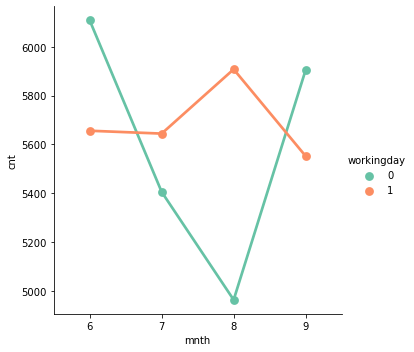

In [11]:
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')

#1.The renting is the maximum during the month 6(i.e. June: beginning of Fall) and also high during the month 9(i.e. September: end of Fall), considering a holiday/weekday
#2.Also, when the renting for holidays is the least in the month 8(i.e. August) there is also a increase in bikes rented on a work day.

#Let's examine how the weather is responsible.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


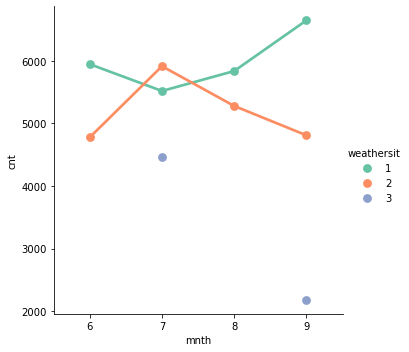

In [12]:
sns.factorplot('mnth','cnt',hue='weathersit',data=df_season_fall, ci=None, palette='Set2')

#There is a much clear weather by the end of Fall and the cloudy, misty weather finds its way back. That very well explains the previous insight on our data, that people enjoy renting and riding bikes on a holiday when the weather is clear.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


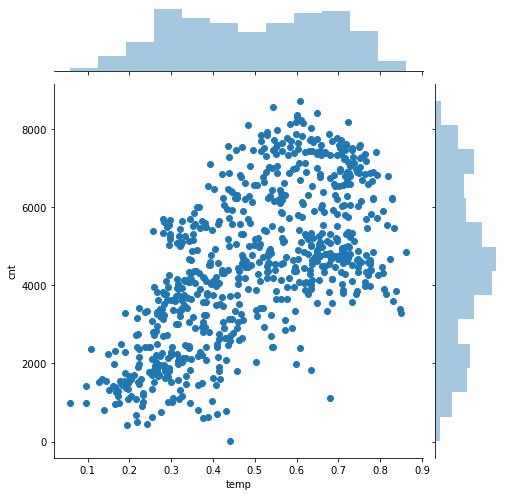

In [13]:
sns.jointplot('temp','cnt',data=day_df,size=7)

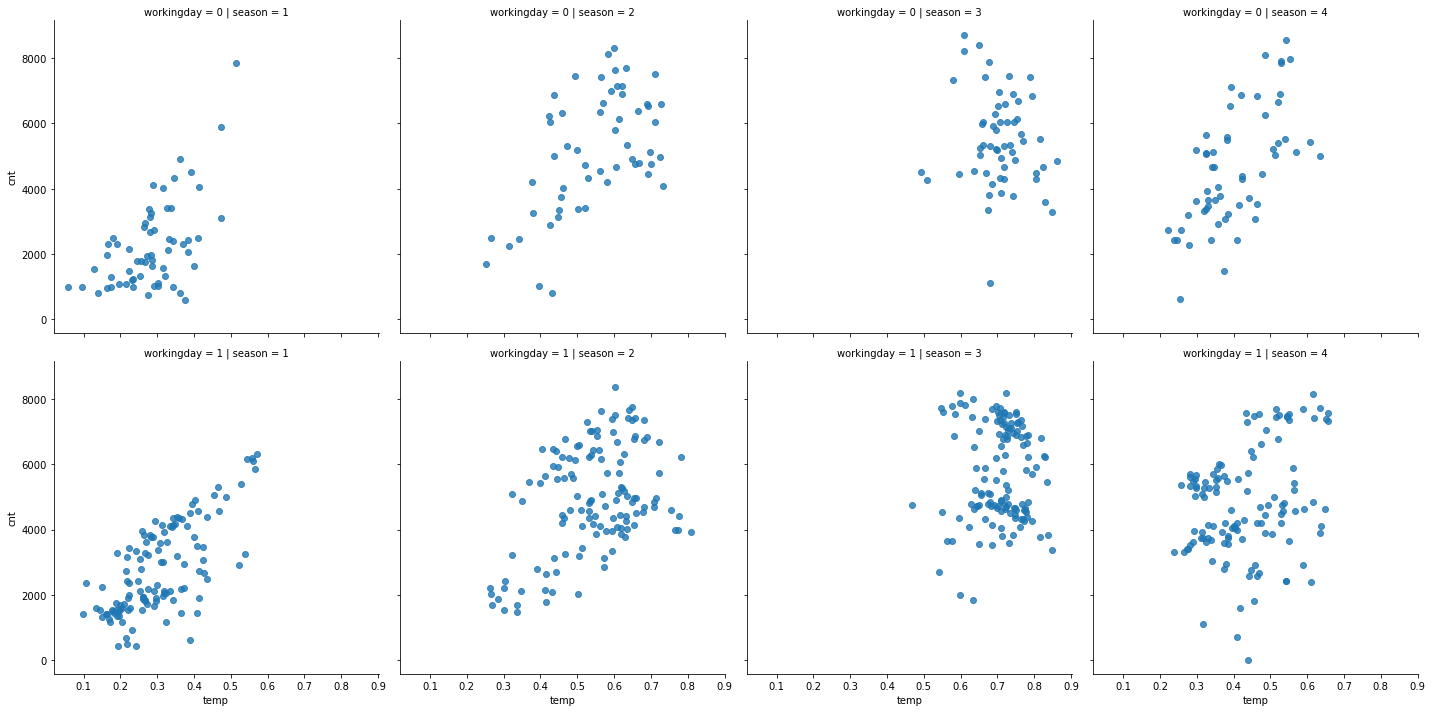

In [14]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day_df,palette='RdBu_r',fit_reg=False)

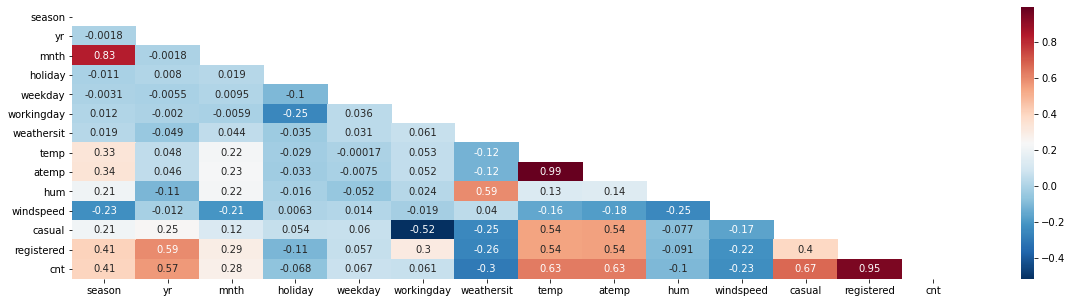

In [15]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(day_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [16]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


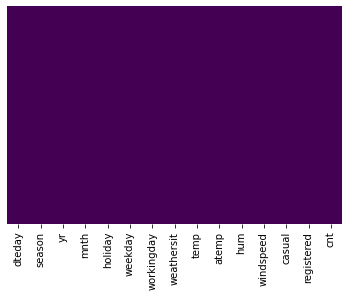

In [17]:
sns.heatmap(day_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

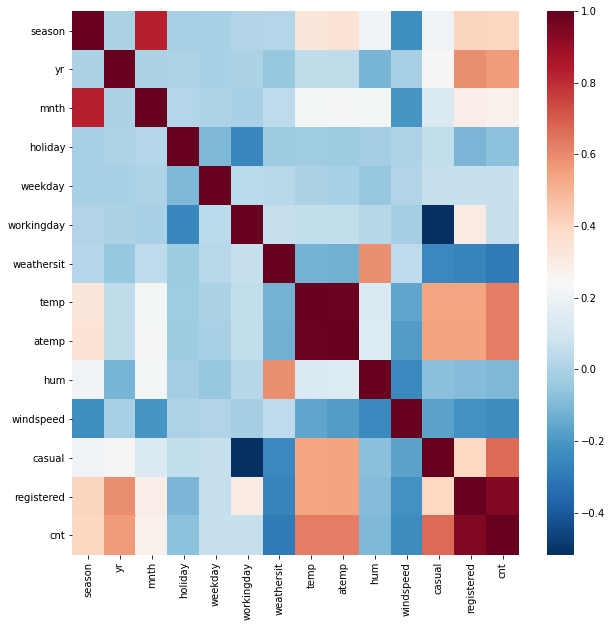

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(day_df.corr(),cmap='RdBu_r')

In [19]:
X=day_df.drop(['dteday','cnt'],axis=1)
y=day_df['cnt']

In [20]:
X.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
predictions=lm.predict(X_test)

In [32]:
predictions

array([5459., 3141., 1446.,  920., 5464., 8362., 7444., 6772., 4985.,
       4790., 3747., 5138., 6734., 1360., 7442., 7359., 6034., 5566.,
       1623., 4765., 1013., 2132., 5557., 4118., 7132., 7055., 5202.,
       1495., 6606., 2169., 3873., 3409., 2368., 1510., 2252., 7907.,
       5305., 1005., 2792., 7261., 4990., 2077., 4648., 6235., 3392.,
       1162., 5342., 6770., 4844., 4672., 5668., 3624., 4362., 7641.,
       1865., 2808., 7534., 4094., 6572., 1248., 3740., 1749., 3786.,
       6140., 5499., 2416., 3831., 1985., 6211., 2743., 1416., 4195.,
       4758., 4123., 3115., 5191., 5515., 3867., 8714., 5423., 5805.,
       1683., 6207., 6227., 4649., 6043., 1635., 4334.,  986., 6398.,
       5058., 7525., 6978., 4795., 7713., 4714., 5572., 7504., 6660.,
       1550., 1321., 3333., 1605., 4968., 5099., 6230., 6273., 4660.,
       5713., 7965., 4717., 5035., 7393., 1301., 4458., 1341., 4760.,
       4363., 4266., 2177., 3940., 4322., 7216., 3387., 7350., 4629.,
       5382., 4835.,

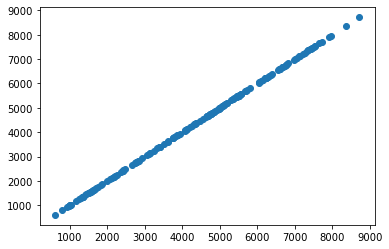

In [27]:
plt.scatter(y_test,predictions)

In [28]:
from sklearn import metrics

In [29]:
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  1.3375287519925645e-12
MSE=  2.5742747734755214e-24
RMS=  1.6044546654472732e-12


In [30]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
season,-1.245274e-13
yr,4.571364e-13
mnth,-8.758507e-15
holiday,-1.078272e-12
weekday,-1.836364e-14
workingday,-1.185783e-12
weathersit,1.877560e-13
temp,-4.830282e-13
atemp,2.327568e-12
hum,2.162348e-13


In [38]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor(random_state = 0)
reg1.fit(X_train, y_train)
pdt=reg1.predict(X_test)

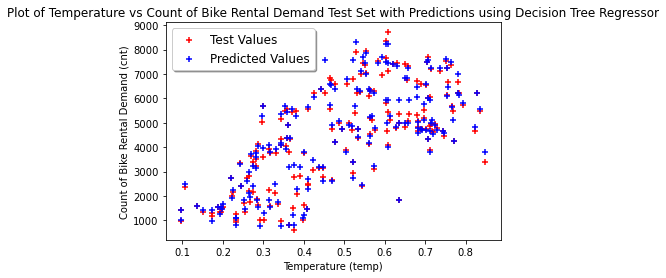

In [39]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set with Predictions using Decision Tree Regressor')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.scatter(X_test.temp,pdt,color='blue',marker='+',label="Predicted Values")
plt.legend(loc="best",shadow=True,fontsize='large')

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg1, X = X_train, y = y_train, cv = 10)
print('accuracies.mean:-')
print(accuracies.mean())
print('accuracies.std:-')
print(accuracies.std())

accuracies.mean:-
0.9824790819997817
accuracies.std:-
0.005726391840166424


In [41]:
accuracies

array([0.98591754, 0.97613205, 0.97132727, 0.97836565, 0.98030684,
       0.98429907, 0.98329454, 0.98569632, 0.98744006, 0.99201148])

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg1.predict(X_test))

173.775956284153

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg1.predict(X_test))

79567.05464480874

In [46]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))

282.07632769307094

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators = 350, random_state = 0)
reg2.fit(X_train, y_train)
prf=reg2.predict(X_test)

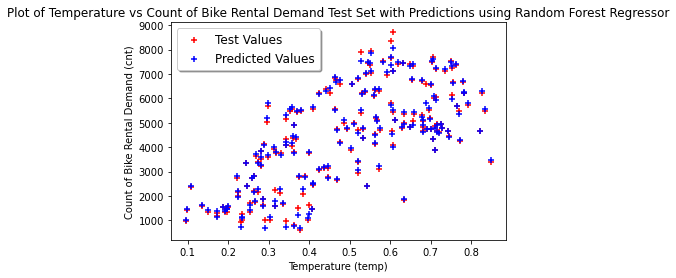

In [48]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set with Predictions using Random Forest Regressor')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.scatter(X_test.temp,prf,color='blue',marker='+',label="Predicted Values")
plt.legend(loc="best",shadow=True,fontsize='large')

In [49]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg2, X = X_train, y = y_train, cv = 10)
print('accuracies.mean:-')
print(accuracies.mean())
print('accuracies.std:-')
print(accuracies.std())

accuracies.mean:-
0.9942030923790209
accuracies.std:-
0.002984160709542465


In [50]:
accuracies

array([0.99565008, 0.99297541, 0.99348472, 0.9865386 , 0.99342231,
       0.99591667, 0.99741197, 0.99508839, 0.99394862, 0.99759415])

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg2.predict(X_test))

80.87570647931301

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg2.predict(X_test))

17691.55242283929

In [53]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))

282.07632769307094

In [54]:
from sklearn.neighbors import KNeighborsRegressor
reg3 = KNeighborsRegressor(n_neighbors = 40, metric = 'minkowski', p = 2, weights='distance', n_jobs=10)
reg3.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=10, n_neighbors=40, weights='distance')

In [55]:
pk=reg3.predict(X_test)

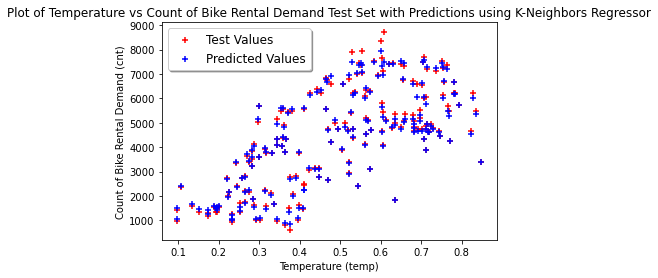

In [56]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set with Predictions using K-Neighbors Regressor')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.scatter(X_test.temp,pk,color='blue',marker='+',label="Predicted Values")
plt.legend(loc="best",shadow=True,fontsize='large')

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg3, X = X_train, y = y_train, cv = 10)
print('accuracies.mean:-')
print(accuracies.mean())
print('accuracies.std:-')
print(accuracies.std())

accuracies.mean:-
0.993038581761754
accuracies.std:-
0.004712056865048358


In [58]:
accuracies

array([0.98970474, 0.99101607, 0.99059251, 0.98164573, 0.995479  ,
       0.99450253, 0.99767945, 0.99518997, 0.99670869, 0.99786712])

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, reg3.predict(X_test))

88.50318940514667

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg3.predict(X_test))

22261.536969996414

In [61]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))

282.07632769307094

In [64]:
import xgboost as xgb
regxgb = xgb.XGBRegressor(n_estimators=100,earning_rate=2)
regxgb.fit(X_train, y_train)
pxgb=regxgb.predict(X_test)

[20:24:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


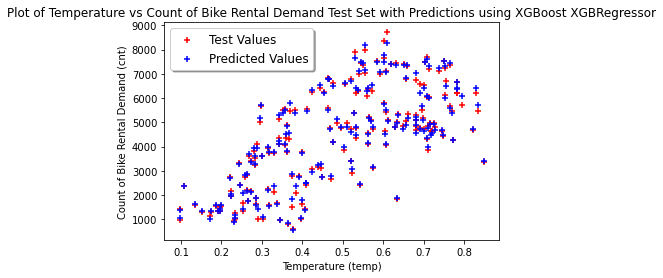

In [65]:
%matplotlib inline
plt.title('Plot of Temperature vs Count of Bike Rental Demand Test Set with Predictions using XGBoost XGBRegressor')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count of Bike Rental Demand (cnt)')
plt.scatter(X_test.temp,y_test,color='red',marker='+',label="Test Values")
plt.scatter(X_test.temp,pxgb,color='blue',marker='+',label="Predicted Values")
plt.legend(loc="best",shadow=True,fontsize='large')

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regxgb, X = X_train, y = y_train, cv = 10)
print('accuracies.mean:-')
print(accuracies.mean())
print('accuracies.std:-')
print(accuracies.std())

[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [67]:
accuracies

array([0.99612253, 0.99071129, 0.99546913, 0.98784762, 0.99297692,
       0.9944584 , 0.99808156, 0.99614868, 0.99477932, 0.99750691])

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, regxgb.predict(X_test))

92.43065439026212

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, regxgb.predict(X_test))

17091.62951977024

In [70]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, reg1.predict(X_test)))

282.07632769307094